## Link to this notebook: https://colab.research.google.com/drive/1lP1RHfycIpZF9tkqvUtRieN75MA4dCON?usp=sharing

#⭐AI-Powered Job Market Insights

###Topic & Dataset


For this project, I chose an AI-powered Job Market dataset, and it includes both qualitative data (job titles, skills, AI adoption level, Automation Risk leverl...) and quantitative data (salaries). It focuses on human behavior in terms of job trends, skill demands, and automation risks.

Data Link: https://drive.google.com/file/d/1nTnBvxmj84jGOjRCeje244Tvivolm67g/view?usp=sharing

I aim to explore how AI and automation are impacting job opportunities, skills required, and salary trends across industries.

##Load the dataset

In [ ]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/ai_job_market_insights.csv')
data.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


## Problem 2.1 Data Cleaning

In [ ]:
data.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [ ]:
data.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [ ]:
data.isna().sum()

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
len(data.Job_Title.unique())

10

In [ ]:
data[data['Job_Title'].duplicated(keep=False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


There aren't null values or unnecessary / extraneous columns


##Problem 2.2 Descriptive Statistics



In [ ]:
# Calculate descriptive statistics for continuous data (e.g., Salary)
mean_salary = data['Salary_USD'].mean()
median_salary = data['Salary_USD'].median()
mode_salary = data['Salary_USD'].mode()[0]  # Mode could have multiple values, taking the first one
std_salary = data['Salary_USD'].std()

# Output the results
print(f"Mean Salary: ${mean_salary:.2f}")
print(f"Median Salary: ${median_salary:.2f}")
print(f"Mode Salary: ${mode_salary:.2f}")
print(f"Standard Deviation of Salary: ${std_salary:.2f}")

Mean Salary: $91222.39
Median Salary: $91998.20
Mode Salary: $31969.53
Standard Deviation of Salary: $20504.29


In [ ]:
# Frequency counts for qualitative data
qualitative_columns = ['Job_Title', 'AI_Adoption_Level', 'Automation_Risk', 'Job_Growth_Projection', 'Required_Skills']

# Loop through qualitative columns and display frequency counts for each
for col in qualitative_columns:
    print(f"Frequency counts for {col}:")
    print(data[col].value_counts())
    print("\n")  # Add space between the output of each column


Frequency counts for Job_Title:
Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64


Frequency counts for AI_Adoption_Level:
AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype: int64


Frequency counts for Automation_Risk:
Automation_Risk
Medium    173
High      169
Low       158
Name: count, dtype: int64


Frequency counts for Job_Growth_Projection:
Job_Growth_Projection
Growth     169
Decline    169
Stable     162
Name: count, dtype: int64


Frequency counts for Required_Skills:
Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Sales                 49
Data Analysis         49
Marketing             45
JavaS

#Problem 2.3
##Visualization 1: AI Adoption Across Industries
It will show how AI adoption levels vary across industries, which helps illustrate the relationship between AI integration and different sectors.

In [ ]:
# Ensure 'AI_Adoption_Level' is categorical with the desired order
data['AI_Adoption_Level'] = pd.Categorical(data['AI_Adoption_Level'], categories=['Low', 'Medium', 'High'], ordered=True)

# Aggregate data to get counts for each industry and AI adoption level
adoption_counts = data.groupby(['Industry', 'AI_Adoption_Level'])['AI_Adoption_Level'].count().reset_index(name='Count')

# Create the stacked bar chart with a custom color palette
fig = px.bar(adoption_counts, x='Industry', y='Count', color='AI_Adoption_Level',
             title='AI Adoption Levels Across Industries',
             color_discrete_map={'High': '#440154', 'Medium': '#3B528B', 'Low': '#21918C'})  # Custom color palette

# Customize axes and layout
fig.update_layout(
    xaxis_title='Industry',
    yaxis_title='Count',
    legend_title='AI Adoption Level',
    title_x=0.5
)

fig.show()

**Visualization 1: AI Adoption Across Industries** The stacked bar chart reveals that industries like technology, manufacturing lead in AI adoption, with more jobs at high and medium levels of AI integration, while industries like entertainment, transportation show slower adoption of AI technologies.

##Visualization 2: Salary Distribution by Automation Risk
It will show the distribution of salaries based on the automation risk for different job roles, helping illustrate the potential risk of automation and its relationship to compensation.

In [ ]:
# Plot salary distribution by automation risk
fig_salary_risk = px.box(data, x='Automation_Risk', y='Salary_USD',
                         color='Automation_Risk',
                         title='Salary Distribution by Automation Risk',
                         color_discrete_sequence=px.colors.sequential.Viridis)

# Customize axes and layout
fig_salary_risk.update_layout(
    xaxis_title='Automation Risk',
    yaxis_title='Salary (USD)',
    title_x=0.5
)
fig_salary_risk.show()

**Visualization 2: Salary Distribution by Automation Risk**
The box plot shows that salaries are similar. While the median salary for high automation risk jobs is slightly higher, it doesn't necessarily reflect the full picture. Jobs with low and medium automation risk tend to have greater variability in salary, allowing for a wider range of earning potential. In jobs with high automation risk, the salary distribution is more compressed, meaning that while the median might be higher, there’s less opportunity for extremely high or low salaries

# Visualization 3: Salary Distribution by Required Skills
Boxplot showing salary distribution for different required skills in USD.

In [ ]:
fig_skills_salary = px.box(
    data,
    x='Required_Skills',
    y='Salary_USD',
    color='Required_Skills',
    title='Salary Distribution by Required Skills',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_skills_salary.update_layout(
    xaxis_title='Skills',
    yaxis_title='Salary (USD)',
    legend_title='Skills',
    title_x=0.5
)
fig_skills_salary.show()

**Visualization 3: Salary Distribution by Required Skills**The next boxplot reaveals that salaries vary significantly depending on the required skills. Skills like Project Management, Data Analysis, and Communication tend to have higher median salaries, whereas Marketing and JavaScript show lower median salaries. The graph suggests that technical skills such as Javascript and Python generally provide higher upper salary ranges, reflecting their demand in the market.

##Visualization 4: Skills Distribution by AI Adoption Level
The heatmap will help show the intensity of job demand for various skills across different levels of AI adoption.

In [ ]:
# Group the data by AI Adoption Level and Required Skills
skills_ai_adoption_heatmap = data.groupby(['AI_Adoption_Level', 'Required_Skills']).size().reset_index(name='Count')

# Create the heatmap using plotly express
fig_skills_ai_adoption_heatmap = px.density_heatmap(
    skills_ai_adoption_heatmap,
    x='AI_Adoption_Level',
    y='Required_Skills',
    z='Count',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Required Skills by AI Adoption Level (Heatmap)'
)

# Customize axes and layout
fig_skills_ai_adoption_heatmap.update_layout(
    xaxis_title='AI Adoption Level',
    yaxis_title='Skills',
    title_x=0.5
)

# Show the figure
fig_skills_ai_adoption_heatmap.show()

**Visualization 4: Skills Distribution by AI Adoption Level** This heatmap illustrates the distribution of required skills across industries with varying AI adoption levels. Skills like Python and Project Management appear to be in high demand across all levels of AI adoption, especially at Medium and High AI adoption levels. Meanwhile, skills like Sales and Communication show more moderate demand. Machine Learning and Cybersecurity are notably more in demand in industries with High AI adoption levels. The heatmap provides insights into the key skills that are critical for industries as they adopt more AI, signaling areas for job seekers to focus on depending on the sector's AI maturity.

# Visualization 5: Clustered Heatmap
This more combined heatmap shows the relationship between industries, AI adoption, and required skills


In [ ]:
# Create a new dataset combining industry, AI adoption level, and skills
combined_data = data.groupby(['Industry', 'AI_Adoption_Level', 'Required_Skills']).size().reset_index(name='Count')

# Plot a heatmap that shows the relationship between industries, AI adoption, and required skills
fig_combined = px.density_heatmap(
    combined_data,
    x='Industry',
    y='Required_Skills',
    z='Count',
    color_continuous_scale='Viridis',
    facet_col='AI_Adoption_Level',
    title='Skills Demand by AI Adoption Across Industries'
)

fig_combined.update_layout(
    xaxis_title='Industry',
    yaxis_title='Skills',
    coloraxis_colorbar_title='Skill Demand'
)

fig_combined.show()

**Visualization 5: Clustered Heatmap** Following the initial heatmap showing a stacked visualization digs deeper into which specific industries demand particular skills based on their level of AI adoption. In industries with low AI adoption, skills like Project Management is more prominent, especially in sectors like Telecommunication and Education. In industries with high AI adoption, there is a distinct emphasis on skills like Cybersecurity, Python, and Marketing, particularly in Technology sectors.

Together, these heatmaps offer a comprehensive look at how skills are distributed across industries based on their AI integration level. This insight is valuable for professionals aiming to focus on sectors and skills that are evolving with AI adoption trends. It also helps companies in these industries to tailor their workforce development and training strategies accordingly.

#Problem 2.4 Interpretation collected

**Visualization 1: AI Adoption Across Industries** The stacked bar chart reveals that industries like technology, manufacturing lead in AI adoption, with more jobs at high and medium levels of AI integration, while industries like entertainment, transportation show slower adoption of AI technologies.

**Visualization 2: Salary Distribution by Automation Risk**
The box plot shows that salaries are similar. While the median salary for high automation risk jobs is slightly higher, it doesn't necessarily reflect the full picture. Jobs with low and medium automation risk tend to have greater variability in salary, allowing for a wider range of earning potential. In jobs with high automation risk, the salary distribution is more compressed, meaning that while the median might be higher, there’s less opportunity for extremely high or low salaries

**Visualization 3: Salary Distribution by Required Skills**The next boxplot reaveals that salaries vary significantly depending on the required skills. Skills like Project Management, Data Analysis, and Communication tend to have higher median salaries, whereas Marketing and JavaScript show lower median salaries. The graph suggests that technical skills such as Javascript and Python generally provide higher upper salary ranges, reflecting their demand in the market.

**Visualization 4: Skills Distribution by AI Adoption Level** This heatmap illustrates the distribution of required skills across industries with varying AI adoption levels. Skills like Python and Project Management appear to be in high demand across all levels of AI adoption, especially at Medium and High AI adoption levels. Meanwhile, skills like Sales and Communication show more moderate demand. Machine Learning and Cybersecurity are notably more in demand in industries with High AI adoption levels. The heatmap provides insights into the key skills that are critical for industries as they adopt more AI, signaling areas for job seekers to focus on depending on the sector's AI maturity.

**Visualization 5: Clustered Heatmap** Following the initial heatmap showing a stacked visualization digs deeper into which specific industries demand particular skills based on their level of AI adoption. In industries with low AI adoption, skills like Project Management is more prominent, especially in sectors like Telecommunication and Education. In industries with high AI adoption, there is a distinct emphasis on skills like Cybersecurity, Python, and Marketing, particularly in Technology sectors.

Together, these heatmaps offer a comprehensive look at how skills are distributed across industries based on their AI integration level. This insight is valuable for professionals aiming to focus on sectors and skills that are evolving with AI adoption trends. It also helps companies in these industries to tailor their workforce development and training strategies accordingly.

#Problem 3.1
###Test 1: Salary Trends Across AI Adoption Levels (ANOVA)
Objective: Determine if salaries differ across jobs based on AI adoption levels (high, medium, low).

H01: The mean salaries are the same for jobs in industries with different AI adoption levels.

Type I Error: Concluding that salaries differ based on AI adoption levels when they do not.

Type II Error: Failing to detect a difference in salaries when it exists.

Test Type: Means test of multiple groups (ANOVA).

Significance Level: 0.05, Power: 0.8.

MDE: Smallest salary difference that can be detected.

###Test 2: Job Growth and Automation Risk (Proportion Test)

Objective: Compare the proportion of jobs projected for growth across automation risk levels.

H02: The proportion of jobs projected for growth is the same across high, medium, and low automation risk.

Type I Error: Concluding there is a difference in growth projections when there is none.

Type II Error: Failing to detect a difference when one exists.

Test Type: Proportion test of multiple groups (Chi-Square).

Significance Level: 0.05, Power: 0.8.

MDE: Smallest detectable difference in proportions.

#Problem 3.2: Prepare for Tests

In [ ]:
from scipy import stats

# Shapiro-Wilk test for normality on Salary by AI adoption level
for level in ['High', 'Medium', 'Low']:
    salary_data = data[data['AI_Adoption_Level'] == level]['Salary_USD']
    stat, p_value = stats.shapiro(salary_data)
    print(f"Shapiro-Wilk test for {level} AI: stat={stat}, p-value={p_value}")

Shapiro-Wilk test for High AI: stat=0.9898683345699305, p-value=0.3693842485880533
Shapiro-Wilk test for Medium AI: stat=0.9855833143655578, p-value=0.06278575698041534
Shapiro-Wilk test for Low AI: stat=0.9893017041279769, p-value=0.2141500256058193


If p-value > 0.05, data is normally distributed (proceed with ANOVA)

#Problem 3.3: Execute Tests
##Test 1

In [ ]:
#ChatGPT helped with formatting
def perform_anova(data):
    # Perform ANOVA test for salary trends across AI adoption levels
    anova_result = stats.f_oneway(
        data[data['AI_Adoption_Level'] == 'High']['Salary_USD'],
        data[data['AI_Adoption_Level'] == 'Medium']['Salary_USD'],
        data[data['AI_Adoption_Level'] == 'Low']['Salary_USD']
    )

    # Output results with formatted decimals
    print(f"ANOVA result: F-statistic={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")

    # Interpretation
    if anova_result.pvalue < 0.05:
        print("Reject H01: Salaries differ significantly across AI adoption levels.")
    else:
        print("Fail to reject H01: No significant difference in salaries across AI levels.")

perform_anova(data)

ANOVA result: F-statistic=3.47, p-value=0.0319
Reject H01: Salaries differ significantly across AI adoption levels.


##Test 2:

In [ ]:
def perform_chi_square(data):
    # Create a contingency table for Job_Growth_Projection and Automation_Risk
    contingency_table = pd.crosstab(data['Job_Growth_Projection'], data['Automation_Risk'])

    # Perform Chi-Square test for independence
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # Output results with formatted decimals
    print(f"Chi-Square Test: χ²-statistic={chi2_stat:.2f}, p-value={p_value:.4f}, dof={dof}")

    # Print expected frequencies in an easy-to-read format
    print("\nExpected frequencies:")
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
    print(expected_df)

    # Interpretation
    if p_value < 0.05:
        print("Reject H02: Job growth projections differ significantly across automation risk levels.")
    else:
        print("Fail to reject H02: No significant difference in job growth projections across automation risk levels.")

perform_chi_square(data)

Chi-Square Test: χ²-statistic=2.23, p-value=0.6940, dof=4

Expected frequencies:
Automation_Risk          High     Low  Medium
Job_Growth_Projection                        
Decline                57.122  53.404  58.474
Growth                 57.122  53.404  58.474
Stable                 54.756  51.192  56.052
Fail to reject H02: No significant difference in job growth projections across automation risk levels.


#Problem 3.4

###Data Science Speak:
**ANOVA Test** (Salaries across AI adoption levels):
The p-value is 0.0319, which is less than 0.05, so we reject the null hypothesis (H01). This means there is a significant difference in salaries based on AI adoption levels.

Type I Error: This would occur if we wrongly conclude that salaries differ across AI adoption levels when, in reality, they are the same. The risk of this error is 5%, since we are using a 0.05 significance level.

Type II Error: This would occur if we fail to detect a salary difference when one actually exists. Given we rejected H01, we didn’t make a Type II error here, but the power of the study (typically set at 80%) helps control this risk.

**Chi-Square Test** (Job growth projections and automation risk): The p-value is 0.6940, which is greater than 0.05, so we fail to reject the null hypothesis (H02). This means there is no significant difference in job growth projections across automation risk levels.

Type I Error: This would occur if we wrongly conclude that job growth projections differ across automation risk levels when they do not. Since we didn’t reject H02, we avoided a Type I error.

Type II Error: This would occur if we fail to detect a significant difference in job growth projections when one actually exists. Given that we failed to reject H02, there is a possibility of making a Type II error, but the study's power helps to minimize this risk.

###Innovation Speak:
I think the results highlight an interesting contrast between the impact of AI adoption on salaries and the role of automation risk in job growth projections. The ANOVA test suggests that industries with higher levels of AI adoption are likely to offer different salary scales. This indicates that AI integration is influencing compensation structures, with those in high-AI industries possibly commanding higher salaries due to increased demand for specialized skills.

On the other hand, the Chi-Square test shows that job growth does not seem to be significantly affected by automation risk levels. This implies that, for now, the potential threat of automation may not be as immediate a concern in predicting job growth trends as expected. Companies might not need to prioritize automation risk when forecasting job growth, though they should still monitor how automation evolves.

I think this could inform workforce planning strategies, especially for businesses integrating AI. They might focus more on how AI influences salary structures and skill demands, while concerns around automation risk might be addressed later as its impacts on growth become clearer.

In [ ]:
!pip install dash

In [ ]:
# Dashboard Script for Exploring AI and Automation Impact on Job Market
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
from dash import dcc, html, Dash

# Import Output, Input, and State from dash.dependencies for callback definitions
from dash.dependencies import Input, Output, State

# Initialize Dash app
app = Dash(__name__)

# Common button styling
button_style = {
    "backgroundColor": "#404688FF",  # Using the graph palette color
    "padding": "10px",
    "border": "none",
    "borderRadius": "5px",
    "color": "white"
}

link_style = {
    "textDecoration": "none",
    "color": "white"
}

# Page Layout Overview:
# The dashboard is divided into multiple pages for easier consumption by different audience segments.
# Each page will have a specific focus: Overview, Skill Requirements, Salary Analysis, Industry Breakdown, and Test Conclusions.

# Page 1: Overview
page_1_layout = html.Div([
    html.H1("AI and Automation Impact on Job Opportunities, Skills, and Salaries"),
    html.P("This dashboard explores how AI and automation are impacting job opportunities, the skills required, and salary trends across industries."),
    html.P("For individuals familiar with the problem but not statistical science, the dashboard simplifies the findings to highlight how AI adoption influences job opportunities, salary trends, and skill requirements. The visualizations reveal not only where opportunities lie but also the skills that are becoming essential. Understanding these trends can help professionals adapt their career strategies in the face of AI and automation's impact."),
    html.Br(),
    html.Button(html.A("View Skills & Salary Analysis", href="/page-2", style=link_style), style=button_style),
    html.Br(), html.Br(),
    html.Button(html.A("View Industry Adoption & Test Conclusions", href="/page-3", style=link_style), style=button_style)
])

# Page 2: Skills and Salary Analysis
page_2_layout = html.Div([
    html.H2("Skills Required by AI Adoption Level & Salary Distribution"),
    html.Div([
        html.Div(dcc.Graph(figure=fig), style={'width': '32%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div(dcc.Graph(figure=fig_salary_risk), style={'width': '32%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div(dcc.Graph(figure=fig_skills_salary), style={'width': '32%', 'display': 'inline-block', 'padding': '10px'})
    ], style={'display': 'flex', 'flexWrap': 'wrap'}),
    html.P("The first chart highlights which industries are adopting AI at a faster rate. Sectors like technology and manufacturing are leading in AI integration, while others like entertainment and transportation are adopting AI at a slower pace."),
    html.P("The box plot illustrates salary differences based on automation risk. Jobs with higher automation risk show slightly higher median salaries, but have less variation in potential earnings compared to low and medium-risk jobs. This stability could mean less potential for exceptionally high or low earnings, posing a risk of salary stagnation."),
    html.P("The other box plot on the right shows how salaries vary by skills required for jobs. Skills like Project Management, Data Analysis, and Communication tend to command higher median salaries, while Marketing and JavaScript generally have lower median salaries. Developing these high-demand skills could provide better salary outcomes."),
    html.Br(),
    html.Button(html.A("Return to Home Page", href="/page-1", style=link_style), style=button_style),
    html.Br(), html.Br(),
    html.Button(html.A("Next: Industry Adoption & Test Conclusions", href="/page-3", style=link_style), style=button_style)
])

# Page 3: Industry Adoption and Test Conclusions
page_3_layout = html.Div([
    html.H2("AI Adoption by Industry & Test Conclusions"),
    html.Div([
        html.Div(dcc.Graph(figure=fig_skills_ai_adoption_heatmap), style={'width': '40%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div(dcc.Graph(figure=fig_combined), style={'width': '56%', 'display': 'inline-block', 'padding': '10px'})
    ], style={'display': 'flex', 'flexWrap': 'wrap'}),
    html.P("The heatmap illustrates which skills are in demand depending on the AI adoption level in different industries. Skills like Python and Project Management are highly in demand across all AI adoption levels."),
    html.P("This clustered heatmap provides a deeper look into specific industries and their skill demands based on AI adoption levels. For instance, Project Management is particularly in demand in sectors with lower AI adoption, while Cybersecurity and Python are more prominent in sectors with higher AI adoption."),
    html.H2("Statistical Test Conclusions"),
    html.H3("ANOVA Test: Salary Differences Across AI Adoption Levels"),
    html.P("The ANOVA test revealed significant differences in salaries across varying levels of AI adoption. The p-value was less than 0.05, indicating a notable variance."),
    html.P("This suggests that industries with higher AI adoption levels tend to offer different salary scales, highlighting that AI integration influences compensation structures. It is also important to note the risk of Type I and Type II errors, meaning there could be incorrect conclusions or failure to detect real differences."),
    html.H3("Chi-Square Test: Job Growth Projection vs. Automation Risk"),
    html.P("The Chi-Square test showed no significant relationship between job growth projections and automation risk. The findings suggest that automation risk might not immediately impact job growth trends."),
    html.P("For now, the potential threat of automation may not be as pressing in predicting job growth, but it should still be monitored as the impact could become more evident later. There is a risk of Type II error, meaning there is a possibility of failing to detect significant effects."),
    html.Br(),
    html.H1("Conclusion"),
    html.H3("For Individuals:"),
    html.P("To remain competitive in an evolving job market influenced by AI and automation, individuals should focus on developing skills in demand across multiple levels of AI adoption—like Python, Project Management, and Data Analysis—while also considering industry-specific skill demands. Keep in mind that skills could become obsolete as AI technologies advance, so continuous upskilling is crucial."),
    html.H3("For Businesses:"),
    html.P("As industries vary in their pace of AI adoption, tailored workforce planning is essential. High AI-adopting sectors may need to emphasize technical skills like Cybersecurity and Python, whereas sectors still catching up may benefit from bolstered Project Management capabilities."),
    html.H3("Implications for the Future:"),
    html.P("The findings suggest that while AI is driving changes in skill demands and salary structures, the effect of automation risk on job growth is not immediately clear. As the landscape evolves, businesses and individuals alike should continue monitoring and adapting to changes in skills required and salary expectations to stay ahead."),
    html.Button(html.A("Return to Home Page", href="/page-1", style=link_style), style=button_style)
])

# Layout for multi-page dashboard
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content')
])

# Callback to handle page navigation
@app.callback(
    Output('page-content', 'children'),
    Input('url', 'pathname')
)
def display_page(pathname):
    if pathname == '/page-2':
        return page_2_layout
    elif pathname == '/page-3':
        return page_3_layout
    else:
        return page_1_layout

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


<IPython.core.display.Javascript object>

#Problem 5.1 Engage with ChatGPT4
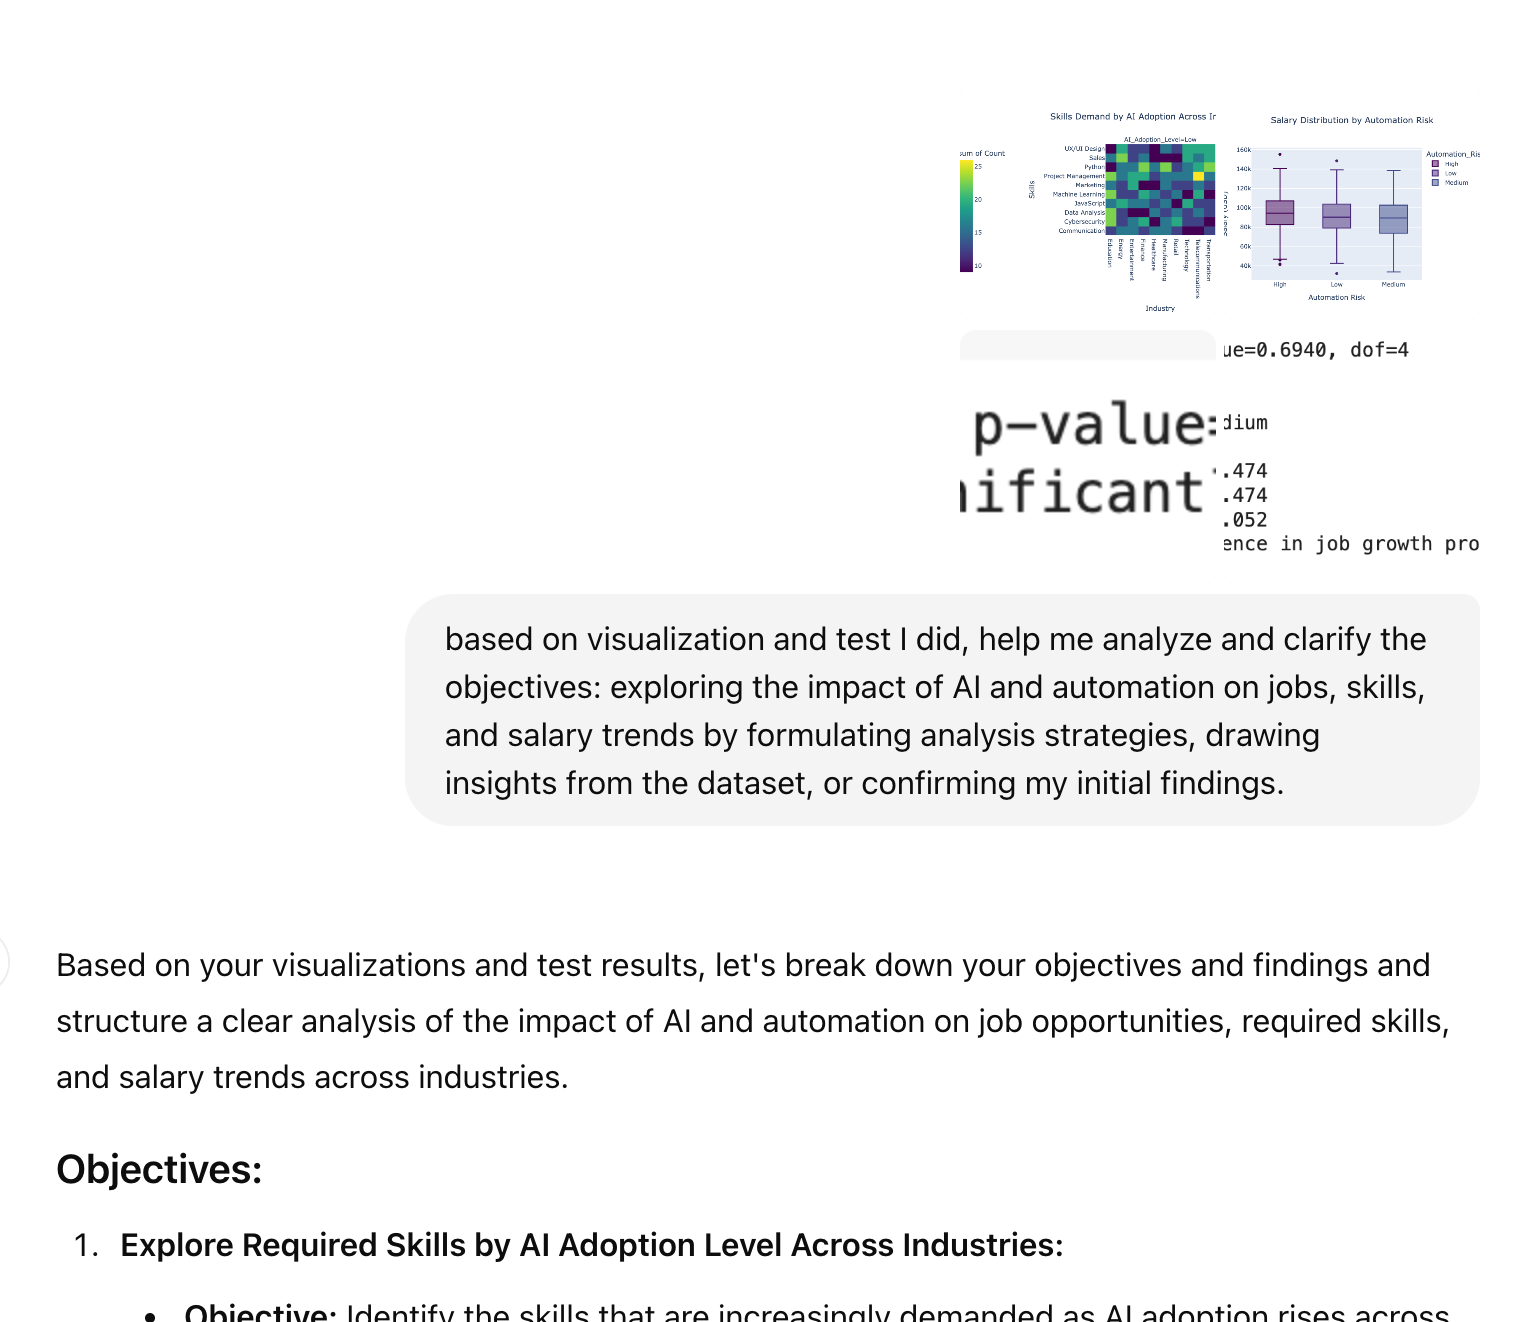GPT4 Answer:

Based on your visualizations and test results, let's break down your objectives and findings and structure a clear analysis of the impact of AI and automation on job opportunities, required skills, and salary trends across industries.

Objectives:
Explore Required Skills by AI Adoption Level Across Industries:

Objective: Identify the skills that are increasingly demanded as AI adoption rises across different industries.
Strategy: Use heatmaps to visualize which skills (e.g., Python, Machine Learning, UX/UI, Data Analysis) are required at different AI adoption levels (Low, Medium, High) across various industries.
Findings: As AI adoption increases, skills like Machine Learning, Python, and Data Analysis appear consistently across industries with high AI adoption. Non-technical skills like Communication and Project Management also see steady demand but at lower levels of AI adoption.
Analyze Salary Trends Across AI Adoption Levels:

Objective: Determine if salaries differ significantly across industries based on AI adoption levels and automation risks.
Strategy: Use box plots to compare salary distributions across industries with different AI adoption levels and test for statistical significance using an ANOVA.
Findings: The ANOVA test confirms that salaries differ significantly across AI adoption levels (p-value=0.0319). This suggests that industries with higher AI adoption tend to offer higher salaries, particularly in roles that require specialized AI skills.
Examine the Impact of Automation Risk on Salary and Job Growth Projections:

Objective: Assess whether automation risk (High, Medium, Low) impacts salary distributions and job growth prospects.
Strategy: Use box plots to show salary distributions by automation risk and a Chi-Square test to evaluate job growth projections.
Findings:
For salary: Higher automation risk does not necessarily lead to higher or lower salaries—there's a broad distribution across different automation risk levels.
For job growth: The Chi-Square test result (p-value=0.6940) suggests no significant difference in job growth projections across automation risk levels, indicating that automation might not be a determining factor for job growth alone.
Insights:
Key Skills for High AI Adoption Industries: The heatmap shows that industries adopting AI at higher levels prioritize technical skills like Python, Machine Learning, and Data Analysis, which aligns with trends in AI-driven fields. However, project management and communication remain crucial, reflecting the need for human oversight and coordination in AI projects.

AI Adoption and Salary Trends: Higher AI adoption correlates with increased salary, confirmed by the ANOVA test. The presence of outliers in the salary distribution suggests that some roles in highly automated environments are disproportionately rewarded, likely for specialized expertise in AI.

Automation Risk and Job Growth: While automation risk does not significantly impact salary distributions or job growth prospects, the diversity in salary across risk levels indicates that industries are compensating for automation by retaining valuable skill sets. However, job growth is more stable across all automation risk levels, implying that the impact of automation on jobs may be slower or less disruptive than anticipated in the short term.

Analysis Strategies:
Compare AI Adoption Levels: Continue analyzing how AI adoption levels affect different job roles within industries. A deeper dive into specific sectors like technology, manufacturing, and healthcare might provide more granular insights into the most affected job categories.

Skills Analysis by Industry: Segment your heatmap by focusing on individual industries to see which specific skills stand out at each AI adoption level. This will help pinpoint which sectors are more tech-driven and which prioritize softer skills despite increasing AI adoption.

Job Growth Projections by Automation Risk: Explore additional factors beyond automation risk (e.g., industry type, geographic region) that could influence job growth projections. Automation risk alone may not fully explain the job growth landscape.

Confirming Your Initial Findings:
Your results largely support the hypothesis that AI adoption impacts salaries and skill demand, with notable shifts in technical skills and salary increases in high-adoption industries.
However, automation risk does not have a clear impact on job growth or salary, which suggests that the future of jobs may be more influenced by the industry-specific application of AI rather than the general risk of automation.
Feel free to refine your analysis with additional tests or insights!

##Compare and Contrast
Both the original analysis and GPT-4 agreed on the broad trends: high AI adoption correlates with higher salaries, and technical skills are crucial for high AI-adopting sectors.

Both concluded that automation risk has no clear immediate impact on job growth.

But GPT-4 provided a generalized interpretation that jobs with higher automation risk consistently have higher median salaries, which was not accurate. The model tended to overstate trends without fully understanding the data distributions.

While our original analysis was data-driven and specific, GPT-4 often provided generalized insights, and its suggestions sometimes lacked grounding in our actual findings.

I think the original analysis was more precise in interpreting statistical tests like ANOVA and Chi-Square, while GPT-4 could misrepresent relationships between variables due to the lack of statistical rigor.
While the foundation model’s insights supported several of our key findings, particularly around the influence of AI adoption on salaries and skill demand—its generalized approach led to inaccuracies. The original analysis, driven by visualizations and statistical tests, provided more reliable and precise insights. This comparison illustrates that while GPT-4 can complement traditional analysis by offering broader perspectives and suggesting further directions, it should not replace data-driven statistical interpretation, particularly when precision is required.